# Импорт библиотек и данных 

In [44]:
import numpy as np
import pandas as pd 
from sklearn.model_selection import train_test_split
from sklearn import linear_model
from sklearn.neighbors import KNeighborsRegressor
from sklearn.preprocessing import PolynomialFeatures
from sklearn import metrics
from sklearn.model_selection import cross_val_score
import matplotlib.pyplot as plt
import seaborn as sns
from mpl_toolkits.mplot3d import Axes3D
import folium
from folium.plugins import HeatMap
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

from sklearn.ensemble import RandomForestRegressor

from sklearn.preprocessing import StandardScaler

from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

In [4]:
data = pd.read_csv('kc_house_data.csv')

In [5]:
data.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,...,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,...,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,...,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21613 entries, 0 to 21612
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             21613 non-null  int64  
 1   date           21613 non-null  object 
 2   price          21613 non-null  float64
 3   bedrooms       21613 non-null  int64  
 4   bathrooms      21613 non-null  float64
 5   sqft_living    21613 non-null  int64  
 6   sqft_lot       21613 non-null  int64  
 7   floors         21613 non-null  float64
 8   waterfront     21613 non-null  int64  
 9   view           21613 non-null  int64  
 10  condition      21613 non-null  int64  
 11  grade          21613 non-null  int64  
 12  sqft_above     21613 non-null  int64  
 13  sqft_basement  21613 non-null  int64  
 14  yr_built       21613 non-null  int64  
 15  yr_renovated   21613 non-null  int64  
 16  zipcode        21613 non-null  int64  
 17  lat            21613 non-null  float64
 18  long  

**Что полезного есть в данных для регрессионной модели**: 

1) price - цена дома

2) bedrooms - количество спален 

3) bathrooms - количество ванных комнат 

4) sqft_living - площадь в квадратных футах 

5) sqft_lot - еще какая-то площадь 

6) floors - этажность

7) waterfront - береговая линия 

8) view - есть ли крутой вид 

9) condition - состояние дома

10) grade - грэйд дома

11) sqft_above 

12) sqft_basement

13) sqft_living15

14) sqft_lot15

# EDA

In [7]:
model_data = data[['price', 'bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot', 'floors', 'waterfront', 
                  'view', 'condition', 'grade', 'sqft_above', 'sqft_basement', 'sqft_living15', 'sqft_lot15']]

In [8]:
model_data

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,sqft_living15,sqft_lot15
0,221900.0,3,1.00,1180,5650,1.0,0,0,3,7,1180,0,1340,5650
1,538000.0,3,2.25,2570,7242,2.0,0,0,3,7,2170,400,1690,7639
2,180000.0,2,1.00,770,10000,1.0,0,0,3,6,770,0,2720,8062
3,604000.0,4,3.00,1960,5000,1.0,0,0,5,7,1050,910,1360,5000
4,510000.0,3,2.00,1680,8080,1.0,0,0,3,8,1680,0,1800,7503
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21608,360000.0,3,2.50,1530,1131,3.0,0,0,3,8,1530,0,1530,1509
21609,400000.0,4,2.50,2310,5813,2.0,0,0,3,8,2310,0,1830,7200
21610,402101.0,2,0.75,1020,1350,2.0,0,0,3,7,1020,0,1020,2007
21611,400000.0,3,2.50,1600,2388,2.0,0,0,3,8,1600,0,1410,1287


## Для начала можно проверить распределения всех ключевых фич и связи между ними 

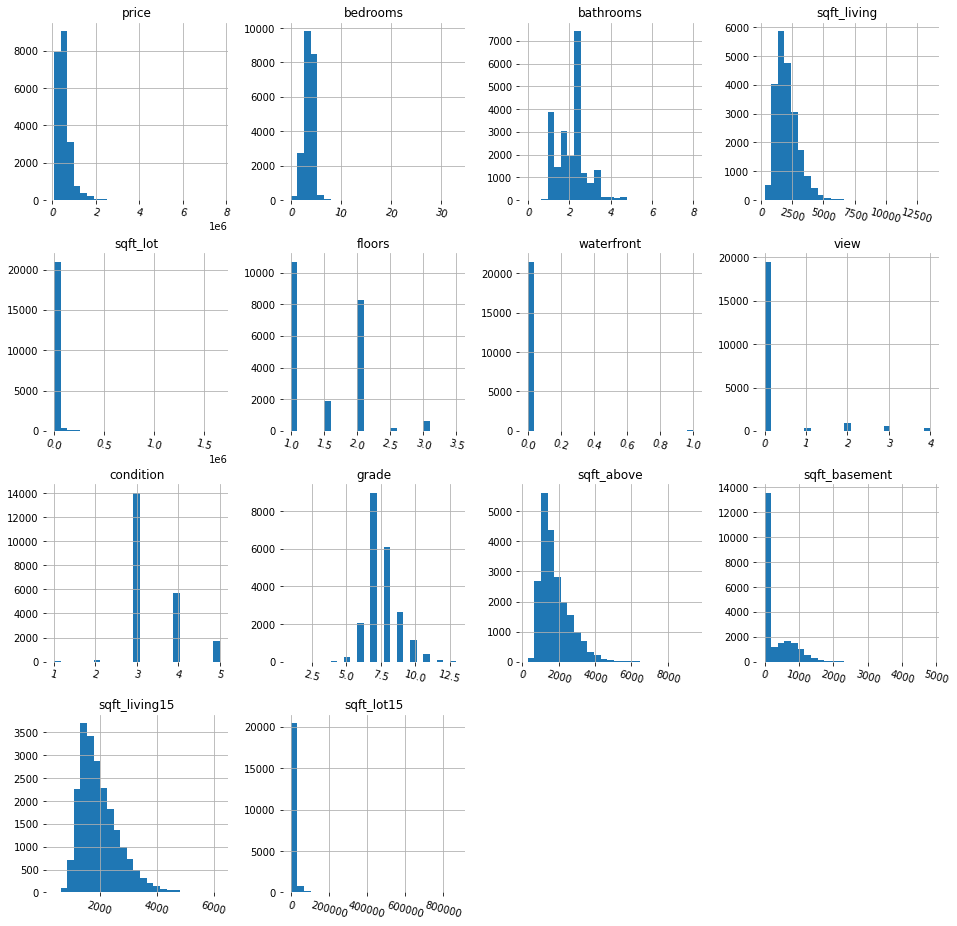

In [9]:
h = model_data.hist(bins=25,figsize=(16,16),xlabelsize='10',ylabelsize='10',xrot=-15)
sns.despine(left=True, bottom=True)
[x.title.set_size(12) for x in h.ravel()];
[x.yaxis.tick_left() for x in h.ravel()];

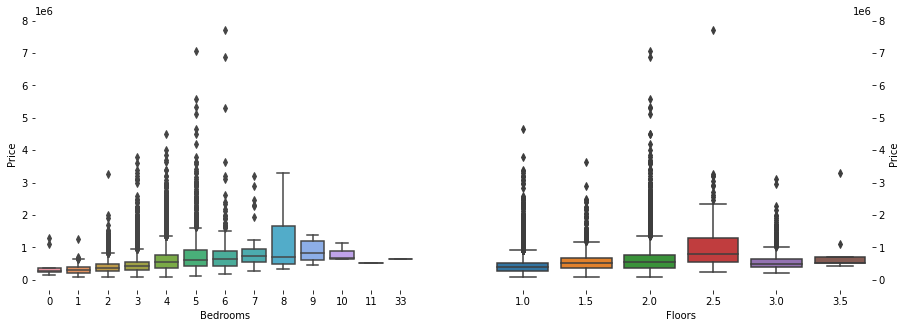

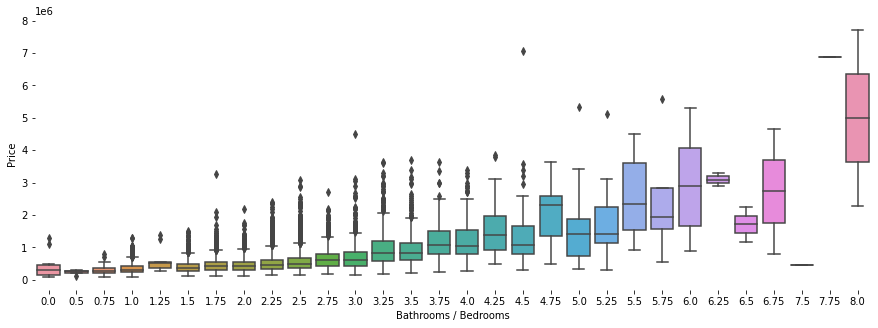

In [10]:
f, axes = plt.subplots(1, 2,figsize=(15,5))
sns.boxplot(x=model_data['bedrooms'],y=model_data['price'], ax=axes[0])
sns.boxplot(x=model_data['floors'],y=model_data['price'], ax=axes[1])
sns.despine(left=True, bottom=True)
axes[0].set(xlabel='Bedrooms', ylabel='Price')
axes[0].yaxis.tick_left()
axes[1].yaxis.set_label_position("right")
axes[1].yaxis.tick_right()
axes[1].set(xlabel='Floors', ylabel='Price')

f, axe = plt.subplots(1, 1,figsize=(15,5))
sns.despine(left=True, bottom=True)
sns.boxplot(x=model_data['bathrooms'],y=model_data['price'], ax=axe)
axe.yaxis.tick_left()
axe.set(xlabel='Bathrooms / Bedrooms', ylabel='Price');

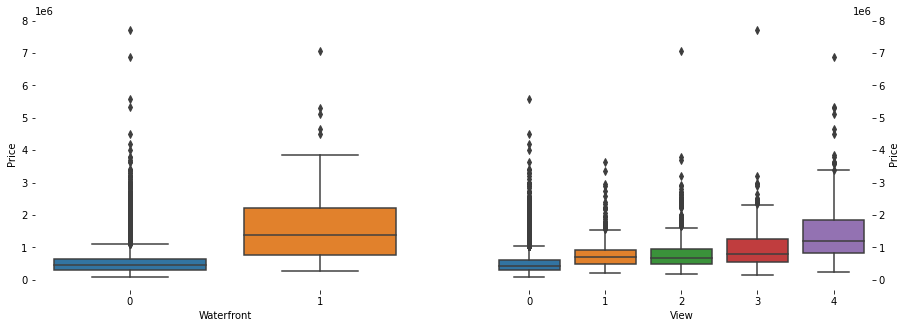

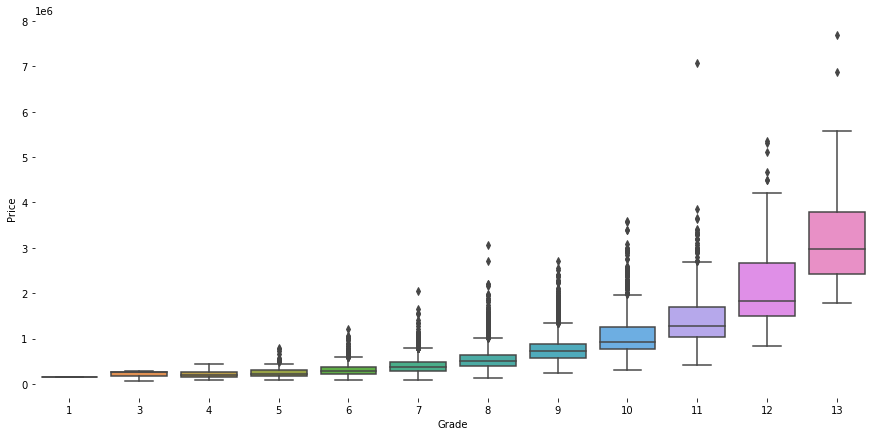

In [11]:
f, axes = plt.subplots(1, 2,figsize=(15,5))
sns.boxplot(x=model_data['waterfront'],y=model_data['price'], ax=axes[0])
sns.boxplot(x=model_data['view'],y=model_data['price'], ax=axes[1])
sns.despine(left=True, bottom=True)
axes[0].set(xlabel='Waterfront', ylabel='Price')
axes[0].yaxis.tick_left()
axes[1].yaxis.set_label_position("right")
axes[1].yaxis.tick_right()
axes[1].set(xlabel='View', ylabel='Price')

f, axe = plt.subplots(1, 1,figsize=(15,7))
sns.boxplot(x=model_data['grade'],y=model_data['price'], ax=axe)
sns.despine(left=True, bottom=True)
axe.yaxis.tick_left()
axe.set(xlabel='Grade', ylabel='Price');

## Вот что может помешать регрессионной модели: 

- Большое количество выбросов 
- Мультиколлиниарность

Сначала проверим модль на стандартных данных и потом попробуем их почистить от выбросов, учесть мультиколлиниарность и использовать модели со встроенной регуляризацией. 


# Первая модель простой линейной регрессии без стандартизации и регуляризации

In [50]:
df = data.copy()

In [51]:
train_data,test_data = train_test_split(df,train_size = 0.8,random_state=3)
#простая линейная модель с одной фичей 
lr = linear_model.LinearRegression()
X_train = np.array(train_data['sqft_living'], dtype=pd.Series).reshape(-1,1)
y_train = np.array(train_data['price'], dtype=pd.Series)
lr.fit(X_train,y_train)

X_test = np.array(test_data['sqft_living'], dtype=pd.Series).reshape(-1,1)
y_test = np.array(test_data['price'], dtype=pd.Series)

pred = lr.predict(X_test)

print('MAE: {:.2f}'.format(mean_absolute_error(y_test, pred)))
print('MSE: {:.2f}'.format(mean_squared_error(y_test, pred)))
print('R2: {:.2f}'.format(r2_score(y_test, pred)))

MAE: 169637.51
MSE: 64662971143.35
R2: 0.50


Ну мягко говоря на таких данных получается не очень обычной регрессией - близко к угадыванию. 
Разумнее всего будет идти по порядку: 

- Почистить выбросы в данных

- Стандартизировать, так как данные разной размерности

- Поменять модель на модель со встроенной регуляризацией (Лучше попробовать Лассо)

# Корматрица

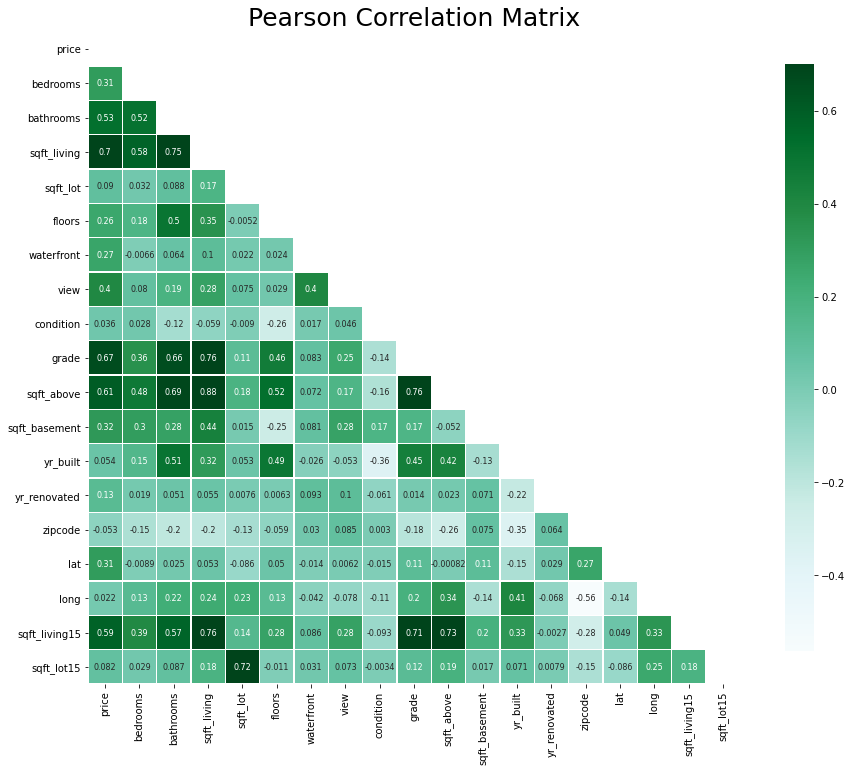

In [14]:
features = ['price','bedrooms','bathrooms','sqft_living','sqft_lot','floors','waterfront',
            'view','condition','grade','sqft_above','sqft_basement','yr_built','yr_renovated',
            'zipcode','lat','long','sqft_living15','sqft_lot15']

mask = np.zeros_like(df[features].corr(), dtype=np.bool) 
mask[np.triu_indices_from(mask)] = True 

f, ax = plt.subplots(figsize=(16, 12))
plt.title('Pearson Correlation Matrix',fontsize=25)

sns.heatmap(df[features].corr(),linewidths=0.25,vmax=0.7,square=True,cmap="BuGn", #"BuGn_r" to reverse 
            linecolor='w',annot=True,annot_kws={"size":8},mask=mask,cbar_kws={"shrink": .9});

# Группировка и подготовка данных

In [53]:
df_dm=df.copy()
df_dm.describe()

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
count,2.161300e+04,2.161300e+04,21613.000000,21613.000000,21613.000000,2.161300e+04,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000
mean,4.580302e+09,5.400881e+05,3.370842,2.114757,2079.899736,1.510697e+04,1.494309,0.007542,0.234303,3.409430,7.656873,1788.390691,291.509045,1971.005136,84.402258,98077.939805,47.560053,-122.213896,1986.552492,12768.455652
std,2.876566e+09,3.671272e+05,0.930062,0.770163,918.440897,4.142051e+04,0.539989,0.086517,0.766318,0.650743,1.175459,828.090978,442.575043,29.373411,401.679240,53.505026,0.138564,0.140828,685.391304,27304.179631
min,1.000102e+06,7.500000e+04,0.000000,0.000000,290.000000,5.200000e+02,1.000000,0.000000,0.000000,1.000000,1.000000,290.000000,0.000000,1900.000000,0.000000,98001.000000,47.155900,-122.519000,399.000000,651.000000
25%,2.123049e+09,3.219500e+05,3.000000,1.750000,1427.000000,5.040000e+03,1.000000,0.000000,0.000000,3.000000,7.000000,1190.000000,0.000000,1951.000000,0.000000,98033.000000,47.471000,-122.328000,1490.000000,5100.000000
50%,3.904930e+09,4.500000e+05,3.000000,2.250000,1910.000000,7.618000e+03,1.500000,0.000000,0.000000,3.000000,7.000000,1560.000000,0.000000,1975.000000,0.000000,98065.000000,47.571800,-122.230000,1840.000000,7620.000000
75%,7.308900e+09,6.450000e+05,4.000000,2.500000,2550.000000,1.068800e+04,2.000000,0.000000,0.000000,4.000000,8.000000,2210.000000,560.000000,1997.000000,0.000000,98118.000000,47.678000,-122.125000,2360.000000,10083.000000
max,9.900000e+09,7.700000e+06,33.000000,8.000000,13540.000000,1.651359e+06,3.500000,1.000000,4.000000,5.000000,13.000000,9410.000000,4820.000000,2015.000000,2015.000000,98199.000000,47.777600,-121.315000,6210.000000,871200.000000


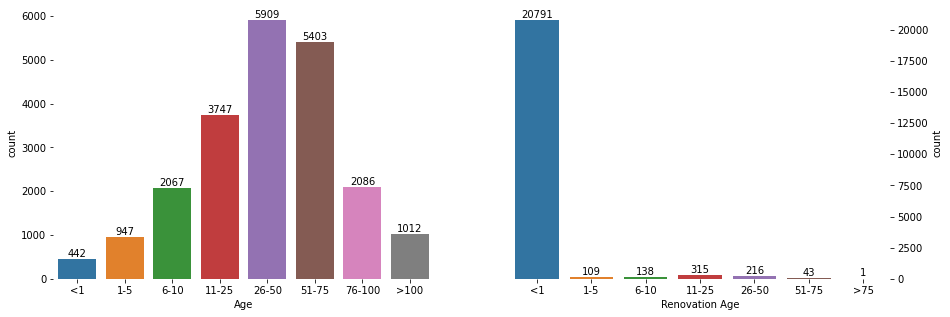

In [54]:
# год продажи
df_dm['sales_yr']=df_dm['date'].astype(str).str[:4]

# возраст здания на момент продажи
df_dm['age']=df_dm['sales_yr'].astype(int)-df_dm['yr_built']
# возраст ремонта
df_dm['age_rnv']=0
df_dm['age_rnv']=df_dm['sales_yr'][df_dm['yr_renovated']!=0].astype(int)-df_dm['yr_renovated'][df_dm['yr_renovated']!=0]
df_dm['age_rnv'][df_dm['age_rnv'].isnull()]=0

# группировка
bins = [-2,0,5,10,25,50,75,100,100000]
labels = ['<1','1-5','6-10','11-25','26-50','51-75','76-100','>100']
df_dm['age_binned'] = pd.cut(df_dm['age'], bins=bins, labels=labels)

bins = [-2,0,5,10,25,50,75,100000]
labels = ['<1','1-5','6-10','11-25','26-50','51-75','>75']
df_dm['age_rnv_binned'] = pd.cut(df_dm['age_rnv'], bins=bins, labels=labels)

# визуализация
f, axes = plt.subplots(1, 2,figsize=(15,5))
p1=sns.countplot(df_dm['age_binned'],ax=axes[0])
for p in p1.patches:
    height = p.get_height()
    p1.text(p.get_x()+p.get_width()/2,height + 50,height,ha="center")   
p2=sns.countplot(df_dm['age_rnv_binned'],ax=axes[1])
sns.despine(left=True, bottom=True)
for p in p2.patches:
    height = p.get_height()
    p2.text(p.get_x()+p.get_width()/2,height + 200,height,ha="center")
    
axes[0].set(xlabel='Age')
axes[0].yaxis.tick_left()
axes[1].yaxis.set_label_position("right")
axes[1].yaxis.tick_right()
axes[1].set(xlabel='Renovation Age');

# категориальные даныне 
df_dm = pd.get_dummies(df_dm, columns=['age_binned','age_rnv_binned'])

# Тест линейной модели с перебором фичей 

In [55]:
features = ['bedrooms','bathrooms','sqft_living','sqft_lot','floors','zipcode']

X_train, X_test, y_train, y_test = train_test_split(df_dm[features], data['price'], test_size=0.2, random_state=0)

complex_model_1 = linear_model.LinearRegression()
complex_model_1.fit(X_train,y_train)

print('Intercept: {}'.format(complex_model_1.intercept_))
print('Coefficients: {}'.format(complex_model_1.coef_))

pred = complex_model_1.predict(X_test)
cv = float(format(cross_val_score(complex_model_1,X_train,y_train,cv=5).mean(),'.3f'))


print('MAE: {:.2f}'.format(mean_absolute_error(y_test, pred)))
print('MSE: {:.2f}'.format(mean_squared_error(y_test, pred)))
print('R2: {:.2f}'.format(r2_score(y_test, pred)))

Intercept: -60558256.3770172
Coefficients: [-5.66006335e+04  1.10870931e+04  3.20408368e+02 -2.89499128e-01
 -2.41800204e+03  6.17971044e+02]
MAE: 166228.20
MSE: 59538329742.70
R2: 0.50


In [56]:
features = ['bedrooms','bathrooms','sqft_living','sqft_lot','floors','waterfront','view',
             'grade','age_binned_<1', 'age_binned_1-5', 'age_binned_6-10','age_binned_11-25', 
             'age_binned_26-50', 'age_binned_51-75','age_binned_76-100', 'age_binned_>100',
             'zipcode']

X_train, X_test, y_train, y_test = train_test_split(df_dm[features], data['price'], test_size=0.2, random_state=0)

complex_model_1 = linear_model.LinearRegression()
complex_model_1.fit(X_train,y_train)

print('Intercept: {}'.format(complex_model_1.intercept_))
print('Coefficients: {}'.format(complex_model_1.coef_))

pred = complex_model_1.predict(X_test)
cv = float(format(cross_val_score(complex_model_1,X_train,y_train,cv=5).mean(),'.3f'))


print('MAE: {:.2f}'.format(mean_absolute_error(y_test, pred)))
print('MSE: {:.2f}'.format(mean_squared_error(y_test, pred)))
print('R2: {:.2f}'.format(r2_score(y_test, pred)))

Intercept: 11122795.20135913
Coefficients: [-3.59808722e+04  4.39408074e+04  1.75356445e+02 -2.31161548e-01
  1.22594040e+04  5.98165622e+05  4.67915144e+04  1.22914455e+05
 -8.35267652e+04 -1.00996940e+05 -9.94942350e+04 -1.36941270e+05
 -5.29317879e+04  8.21648463e+04  1.81311261e+05  2.10414891e+05
 -1.21165182e+02]
MAE: 136503.32
MSE: 42332304654.39
R2: 0.64


In [57]:
features = ['bedrooms','bathrooms','sqft_living','sqft_lot','floors','waterfront','view',
            'condition','grade','sqft_above','sqft_basement','yr_built','yr_renovated',
            'zipcode','lat','long','sqft_living15','sqft_lot15']


X_train, X_test, y_train, y_test = train_test_split(df_dm[features], data['price'], test_size=0.2, random_state=0)

complex_model_1 = linear_model.LinearRegression()
complex_model_1.fit(X_train,y_train)

print('Intercept: {}'.format(complex_model_1.intercept_))
print('Coefficients: {}'.format(complex_model_1.coef_))

pred = complex_model_1.predict(X_test)
cv = float(format(cross_val_score(complex_model_1,X_train,y_train,cv=5).mean(),'.3f'))


print('MAE: {:.2f}'.format(mean_absolute_error(y_test, pred)))
print('MSE: {:.2f}'.format(mean_squared_error(y_test, pred)))
print('R2: {:.2f}'.format(r2_score(y_test, pred)))

Intercept: 4166134.732318218
Coefficients: [-3.46742834e+04  3.94309995e+04  1.12610340e+02  1.75888746e-01
  7.42456797e+03  6.05600540e+05  5.27368869e+04  2.61695179e+04
  9.35901530e+04  7.27875916e+01  3.98227484e+01 -2.60713695e+03
  2.01053037e+01 -5.67468820e+02  6.04865960e+05 -2.22392027e+05
  2.42333810e+01 -4.67450069e-01]
MAE: 122187.78
MSE: 36280106778.88
R2: 0.69


In [58]:
features = ['bedrooms','bathrooms','sqft_living','sqft_lot','floors','waterfront',
            'view','condition','grade','sqft_above','sqft_basement','age_binned_<1', 
            'age_binned_1-5', 'age_binned_6-10','age_binned_11-25', 'age_binned_26-50',
            'age_binned_51-75','age_binned_76-100', 'age_binned_>100','age_rnv_binned_<1',
            'age_rnv_binned_1-5', 'age_rnv_binned_6-10', 'age_rnv_binned_11-25',
            'age_rnv_binned_26-50', 'age_rnv_binned_51-75', 'age_rnv_binned_>75',
            'zipcode','lat','long','sqft_living15','sqft_lot15']

X_train, X_test, y_train, y_test = train_test_split(df_dm[features], data['price'], test_size=0.2, random_state=0)

complex_model_1 = linear_model.LinearRegression()
complex_model_1.fit(X_train,y_train)

print('Intercept: {}'.format(complex_model_1.intercept_))
print('Coefficients: {}'.format(complex_model_1.coef_))

pred = complex_model_1.predict(X_test)
cv = float(format(cross_val_score(complex_model_1,X_train,y_train,cv=5).mean(),'.3f'))


print('MAE: {:.2f}'.format(mean_absolute_error(y_test, pred)))
print('MSE: {:.2f}'.format(mean_squared_error(y_test, pred)))
print('R2: {:.2f}'.format(r2_score(y_test, pred)))

Intercept: 6352822.0435293745
Coefficients: [-3.23649039e+04  3.39142529e+04  1.12607350e+02  1.79494961e-01
 -1.24555558e+04  6.13729642e+05  5.40639439e+04  3.27346801e+04
  9.28245316e+04  7.31912406e+01  3.94161655e+01 -3.65353314e+04
 -4.75163947e+04 -6.67413463e+04 -9.04774678e+04 -6.09722951e+04
  3.34310883e+04  1.20730699e+05  1.48081048e+05 -2.29718233e+04
  9.87126127e+04  6.38251629e+04  4.60470965e+04 -3.65797717e+04
 -1.49033277e+05  0.00000000e+00 -6.44931909e+02  6.10803880e+05
 -2.22712840e+05  2.57119663e+01 -3.92199599e-01]
MAE: 122215.29
MSE: 36086756669.20
R2: 0.70


Видно, что для оптимального результата лучше взять расширенный список фичей. 
Еще можно попробовать улучшить результат через модели со встроенной регуляризацией. 

# Модели со встроенной регуляризацией

In [61]:
for alpha in [1, 10, 100, 1000]:
    X_train, X_test, y_train, y_test = train_test_split(df_dm[features], data['price'], test_size=0.2, random_state=0)

    model = linear_model.Ridge(alpha=alpha)
    model.fit(X_train,y_train)

    pred = model.predict(X_test)


    print('Intercept: {}'.format(model.intercept_))
    print('Coefficients: {}'.format(model.coef_))

    cv = float(format(cross_val_score(model,X_train,y_train,cv=5).mean(),'.3f'))


    print('MAE: {:.2f}'.format(mean_absolute_error(y_test, pred)))
    print('MSE: {:.2f}'.format(mean_squared_error(y_test, pred)))
    print('R2: {:.2f}'.format(r2_score(y_test, pred)))

Intercept: 6323033.1692757225
Coefficients: [-3.24030272e+04  3.39041667e+04  1.12649287e+02  1.78498792e-01
 -1.23489785e+04  6.08262123e+05  5.42957828e+04  3.27328474e+04
  9.28882651e+04  7.31439850e+01  3.95043574e+01 -3.64958801e+04
 -4.75889843e+04 -6.67530376e+04 -9.05500581e+04 -6.09244456e+04
  3.35521498e+04  1.20775413e+05  1.47984843e+05 -2.35561661e+04
  9.70853212e+04  6.26274382e+04  4.54765864e+04 -3.66890951e+04
 -1.44944085e+05  0.00000000e+00 -6.42091950e+02  6.08594909e+05
 -2.21538256e+05  2.56639006e+01 -3.92669233e-01]
MAE: 122192.52
MSE: 36077113923.42
R2: 0.70
Intercept: 6042141.541932051
Coefficients: [-3.27141308e+04  3.37708345e+04  1.13009962e+02  1.70207183e-01
 -1.14688772e+04  5.63251357e+05  5.61945409e+04  3.27399560e+04
  9.34150520e+04  7.27444641e+01  4.02654834e+01 -3.61007219e+04
 -4.81396689e+04 -6.67927968e+04 -9.11371485e+04 -6.05454254e+04
  3.45047324e+04  1.21109446e+05  1.47101583e+05 -2.77355847e+04
  8.48502687e+04  5.38098377e+04  4.149

In [62]:
for alpha in [1, 10, 100, 1000]:
    X_train, X_test, y_train, y_test = train_test_split(df_dm[features], data['price'], test_size=0.2, random_state=0)

    model = linear_model.Lasso(alpha=alpha)
    model.fit(X_train,y_train)

    pred = model.predict(X_test)


    print('Intercept: {}'.format(model.intercept_))
    print('Coefficients: {}'.format(model.coef_))

    cv = float(format(cross_val_score(model,X_train,y_train,cv=5).mean(),'.3f'))


    print('MAE: {:.2f}'.format(mean_absolute_error(y_test, pred)))
    print('MSE: {:.2f}'.format(mean_squared_error(y_test, pred)))
    print('R2: {:.2f}'.format(r2_score(y_test, pred)))

Intercept: 6399867.822760856
Coefficients: [-3.23635427e+04  3.39040644e+04  2.83648614e+02  1.79455511e-01
 -1.24492342e+04  6.13566920e+05  5.40710692e+04  3.27340583e+04
  9.28247182e+04 -9.78482834e+01 -1.31608572e+02 -6.42985441e+04
 -7.53057391e+04 -9.45405568e+04 -1.18281342e+05 -8.87755804e+04
  5.61930391e+03  9.29088295e+04  1.20249408e+05 -4.67281312e+04
  7.47871495e+04  3.99244094e+04  2.22387992e+04 -6.02217754e+04
 -1.72277257e+05  0.00000000e+00 -6.44767146e+02  6.10748324e+05
 -2.22639262e+05  2.57085757e+01 -3.92214357e-01]
MAE: 122219.27
MSE: 36087623055.86
R2: 0.70
Intercept: 6314564.210439546
Coefficients: [-3.23512921e+04  3.38123684e+04  2.83672815e+02  1.79100460e-01
 -1.23923400e+04  6.12102426e+05  5.41351967e+04  3.27284624e+04
  9.28263979e+04 -9.78568301e+01 -1.31484039e+02 -1.93380946e+04
 -3.05804753e+04 -4.99040868e+04 -7.36868456e+04 -4.41757845e+04
  5.01426089e+04  1.37341370e+05  1.64594012e+05 -4.66486414e+04
  7.33442428e+04  3.87038891e+04  2.1850

# Полиномиальная регрессия 

In [67]:
polyfeat = PolynomialFeatures(degree=2)
X_allpoly = polyfeat.fit_transform(df_dm[features])

X_train, X_test, y_train, y_test = train_test_split(X_allpoly, data['price'], test_size=0.2, random_state=0)

model = linear_model.Lasso(alpha=alpha)
model.fit(X_train,y_train)

cv = float(format(cross_val_score(model,X_train,y_train,cv=5).mean(),'.3f'))


print('MAE: {:.2f}'.format(mean_absolute_error(y_test, pred)))
print('MSE: {:.2f}'.format(mean_squared_error(y_test, pred)))
print('R2: {:.2f}'.format(r2_score(y_test, pred)))

MAE: 121662.29
MSE: 36221038735.11
R2: 0.70


In [70]:
polyfeat = PolynomialFeatures(degree=3)
X_allpoly = polyfeat.fit_transform(df_dm[features])

X_train, X_test, y_train, y_test = train_test_split(X_allpoly, data['price'], test_size=0.2, random_state=0)

model = linear_model.Lasso(alpha=alpha)
model.fit(X_train,y_train)

cv = float(format(cross_val_score(model,X_train,y_train,cv=5).mean(),'.3f'))


print('MAE: {:.2f}'.format(mean_absolute_error(y_test, pred)))
print('MSE: {:.2f}'.format(mean_squared_error(y_test, pred)))
print('R2: {:.2f}'.format(r2_score(y_test, pred)))

MAE: 121662.29
MSE: 36221038735.11
R2: 0.70


In [72]:
features = ['bedrooms','bathrooms','sqft_living','sqft_lot','floors','waterfront','view',
            'condition','grade','sqft_above','sqft_basement','yr_built','yr_renovated',
            'zipcode','lat','long','sqft_living15','sqft_lot15']
polyfeat = PolynomialFeatures(degree=2)
X_allpoly = polyfeat.fit_transform(df[features])
X_trainpoly = polyfeat.fit_transform(train_data[features])
X_testpoly = polyfeat.fit_transform(test_data[features])
poly = linear_model.LinearRegression().fit(X_trainpoly, train_data['price'])

pred3 = poly.predict(X_testpoly)

cv3 = float(format(cross_val_score(linear_model.LinearRegression(),X_allpoly,df['price'],cv=5).mean(),'.3f'))

print('MAE: {:.2f}'.format(mean_absolute_error(test_data['price'], pred3)))
print('MSE: {:.2f}'.format(mean_squared_error(test_data['price'], pred3)))
print('R2: {:.2f}'.format(r2_score(test_data['price'], pred3)))


MAE: 98112.58
MSE: 22861125347.55
R2: 0.82


In [74]:
features = ['bedrooms','bathrooms','sqft_living','sqft_lot','floors','waterfront','view',
            'condition','grade','sqft_above','sqft_basement','yr_built','yr_renovated',
            'zipcode','lat','long','sqft_living15','sqft_lot15']

polyfeat = PolynomialFeatures(degree=2)
X_allpoly = polyfeat.fit_transform(df[features])
X_trainpoly = polyfeat.fit_transform(train_data_dm[features])
X_testpoly = polyfeat.fit_transform(test_data_dm[features])
poly = linear_model.LinearRegression().fit(X_trainpoly, train_data_dm['price'])

pred3 = poly.predict(X_testpoly)

cv3 = float(format(cross_val_score(linear_model.LinearRegression(),X_allpoly,df['price'],cv=5).mean(),'.3f'))

print('MAE: {:.2f}'.format(mean_absolute_error(test_data_dm['price'], pred3)))
print('MSE: {:.2f}'.format(mean_squared_error(test_data_dm['price'], pred3)))
print('R2: {:.2f}'.format(r2_score(test_data_dm['price'], pred3)))


MAE: 98112.58
MSE: 22861125347.55
R2: 0.82


# Случайный лес 

In [75]:
df_dm[features]

,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,3,1.00,1180,5650,1.0,0,0,3,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,3,2.25,2570,7242,2.0,0,0,3,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,2,1.00,770,10000,1.0,0,0,3,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,4,3.00,1960,5000,1.0,0,0,5,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,3,2.00,1680,8080,1.0,0,0,3,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21608,3,2.50,1530,1131,3.0,0,0,3,8,1530,0,2009,0,98103,47.6993,-122.346,1530,1509
21609,4,2.50,2310,5813,2.0,0,0,3,8,2310,0,2014,0,98146,47.5107,-122.362,1830,7200
21610,2,0.75,1020,1350,2.0,0,0,3,7,1020,0,2009,0,98144,47.5944,-122.299,1020,2007
21611,3,2.50,1600,2388,2.0,0,0,3,8,1600,0,2004,0,98027,47.5345,-122.069,1410,1287


In [76]:
features = ['bedrooms','bathrooms','sqft_living','sqft_lot','floors','waterfront',
            'view','condition','grade','sqft_above','sqft_basement','age_binned_<1', 
            'age_binned_1-5', 'age_binned_6-10','age_binned_11-25', 'age_binned_26-50',
            'age_binned_51-75','age_binned_76-100', 'age_binned_>100','age_rnv_binned_<1',
            'age_rnv_binned_1-5', 'age_rnv_binned_6-10', 'age_rnv_binned_11-25',
            'age_rnv_binned_26-50', 'age_rnv_binned_51-75', 'age_rnv_binned_>75',
            'zipcode','lat','long','sqft_living15','sqft_lot15']

In [77]:
df = df_dm[features]

In [78]:
rf_model = RandomForestRegressor()

In [80]:
X_train, X_test, y_train, y_test = train_test_split(df_dm[features], data['price'], test_size=0.2, random_state=0)
# обучите StandartScaler на обучающей выборке
scaler = StandardScaler()
scaler.fit(X_train)
# Преобразуйте обучающий и валидационные наборы данных
X_train_st = scaler.transform(X_train)
X_test_st = scaler.transform(X_test)

rf_model.fit(X_train_st, y_train)# обучим модель случайного леса



RandomForestRegressor()

In [82]:
rf_predictions = rf_model.predict(X_test_st)

In [83]:
print('MAE: {:.2f}'.format(mean_absolute_error(y_test, rf_predictions)))
print('MSE: {:.2f}'.format(mean_squared_error(y_test, rf_predictions)))
print('R2: {:.2f}'.format(r2_score(y_test, rf_predictions)))

MAE: 64735.17
MSE: 12450126046.69
R2: 0.90


In [84]:
X_train, X_test, y_train, y_test = train_test_split(data[features], data['price'], test_size=0.2, random_state=0)
# обучите StandartScaler на обучающей выборке
scaler = StandardScaler()
scaler.fit(X_train)
# Преобразуйте обучающий и валидационные наборы данных
X_train_st = scaler.transform(X_train)
X_test_st = scaler.transform(X_test)

rf_model.fit(X_train_st, y_train)# обучим модель случайного леса
rf_predictions = rf_model.predict(X_test_st)

print('MAE: {:.2f}'.format(mean_absolute_error(y_test, rf_predictions)))
print('MSE: {:.2f}'.format(mean_squared_error(y_test, rf_predictions)))
print('R2: {:.2f}'.format(r2_score(y_test, rf_predictions)))


KeyError: "['age_binned_11-25', 'age_binned_76-100', 'age_rnv_binned_1-5', 'age_rnv_binned_>75', 'age_binned_51-75', 'age_binned_26-50', 'age_rnv_binned_11-25', 'age_rnv_binned_6-10', 'age_binned_<1', 'age_binned_6-10', 'age_binned_>100', 'age_rnv_binned_26-50', 'age_rnv_binned_<1', 'age_rnv_binned_51-75', 'age_binned_1-5'] not in index"